# Seaborn Tutorial - Visualizing statistical relationships

In [1]:
# Import and set style
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

### Scatter Plots

In [21]:
# Load and preview data
tips = sns.load_dataset('tips') 
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


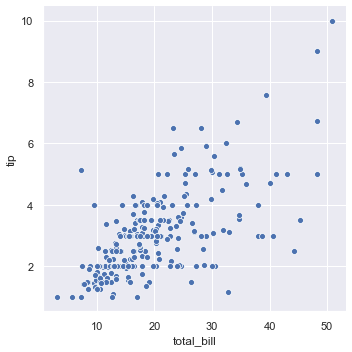

In [5]:
# Scatter Plots
# Default relplot is scatter, could also specify kind = 'scatter'

sns.relplot(x = 'total_bill', y = 'tip', data = tips); 

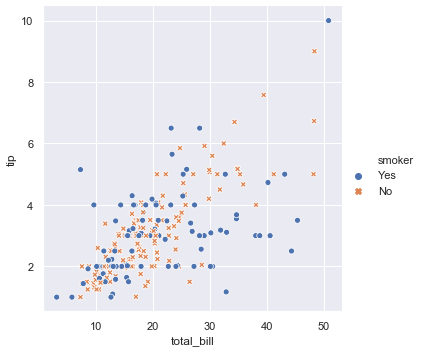

In [8]:
# Add a third dimension using hue (color) and/or style (marker)

sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', style = 'smoker', data = tips);

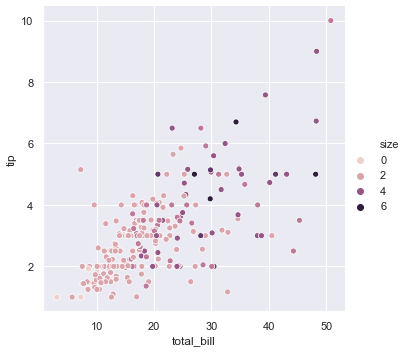

In [9]:
# For numeric variable, automatic switch to sequential palette

sns.relplot(x = 'total_bill', y = 'tip', hue = 'size', data = tips);

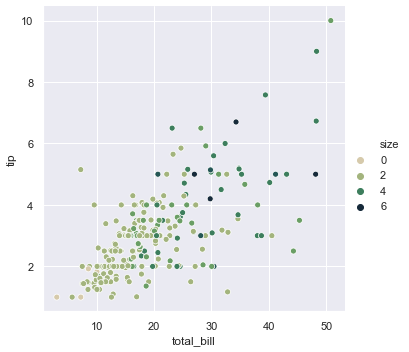

In [12]:
# Change palette
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.7,l=.79", data=tips);

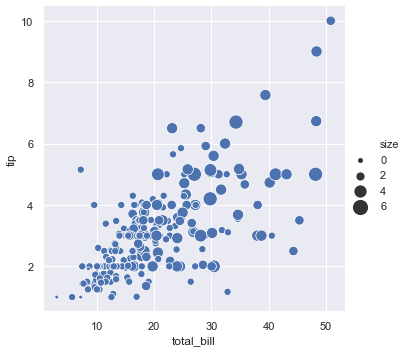

In [13]:
# Change size of dots
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

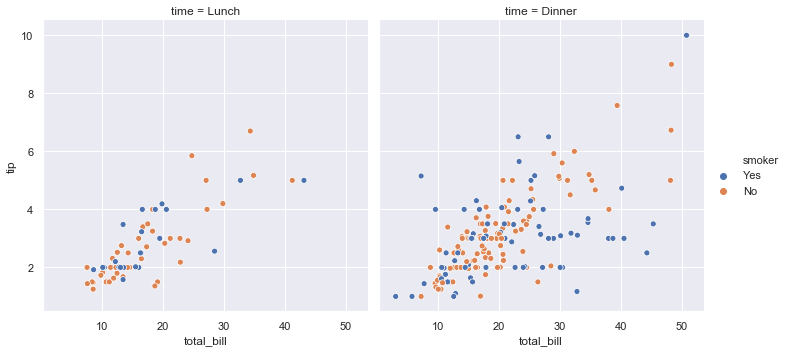

In [17]:
# Multiple relationships with facets, on column or row
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

### Line Plots

In [28]:
# load and preview data
fmri = sns.load_dataset('fmri')
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


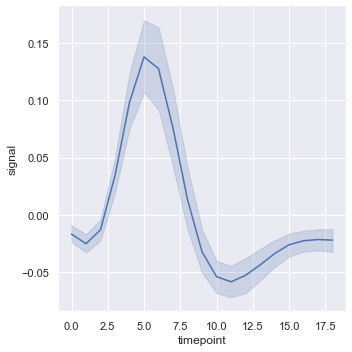

In [23]:
# Line Plot
# Where multiple measurements for x variable, default is to aggregate by plotting mean and 95% confidence interval
# ci = None to remove confidence interval, ci = 'sd' for standard deviation
# estimator = None for no aggregation
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

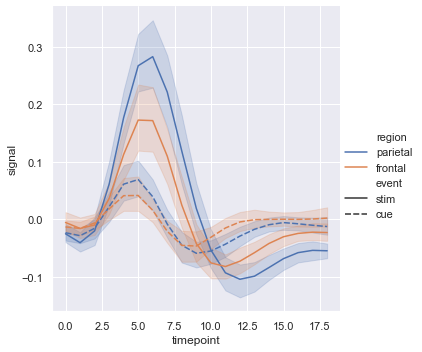

In [24]:
# Consider more variables using hue and style
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

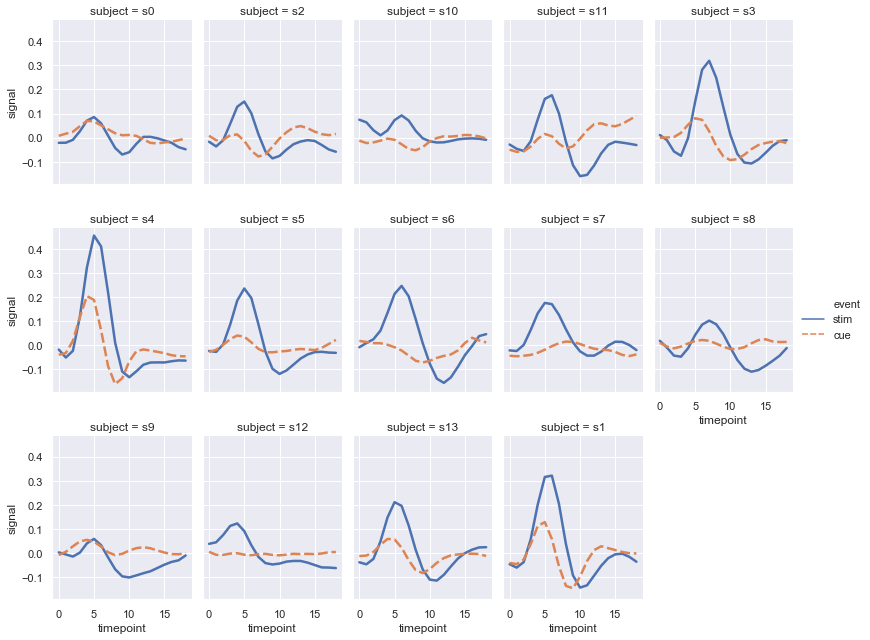

In [27]:
# Using query to only select some of the data
# Facet variable on column and wrap into rows
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

### Plotting with categorical data

In [29]:
sns.set(style="ticks", color_codes=True)

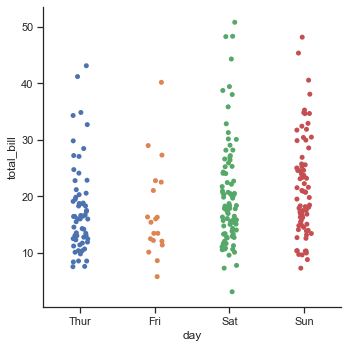

In [33]:
# Use catplot, default is scatterplot kind = 'strip'
sns.catplot(x="day", y="total_bill", kind = 'strip', data=tips);

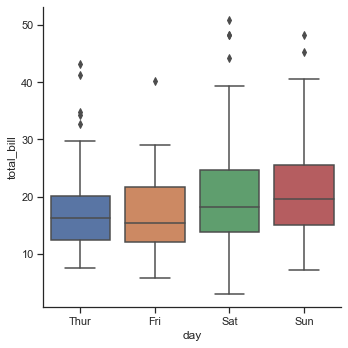

In [34]:
#Boxplot
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

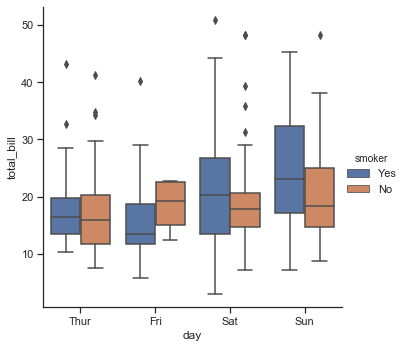

In [35]:
# With hue for third variable
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

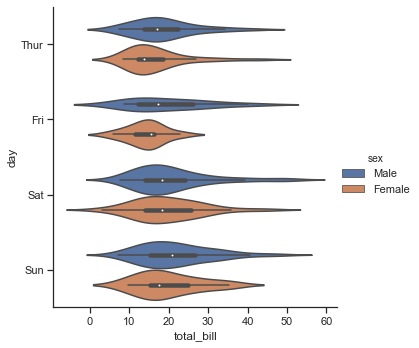

In [36]:
# Violin plot
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips);

In [37]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


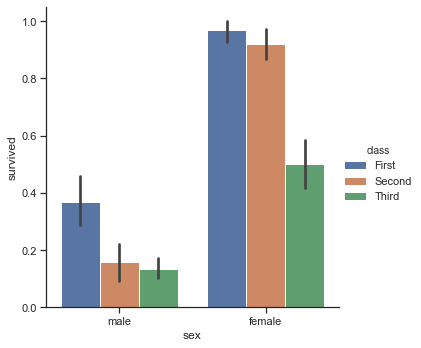

In [40]:
# Bar plot
sns.catplot(x = 'sex', y = 'survived', hue = 'class', kind = 'bar', data = titanic);

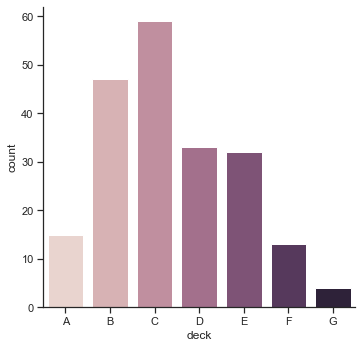

In [42]:
# Count Plot where y is the count of a certain value, only feed in x
sns.catplot(x = 'deck', kind = 'count', palette ='ch:.025', data = titanic);

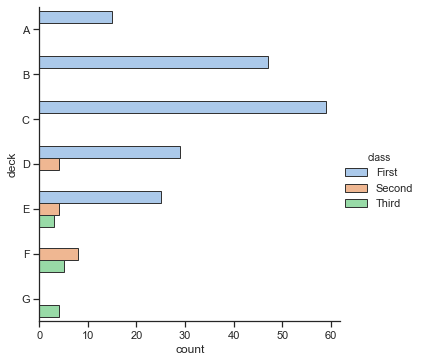

In [49]:
# for vertical version, only speficy y (and hue)
sns.catplot( y = 'deck', hue = 'class',  kind = 'count', palette = 'pastel', edgecolor = '0.2', data = titanic);

### Distributions

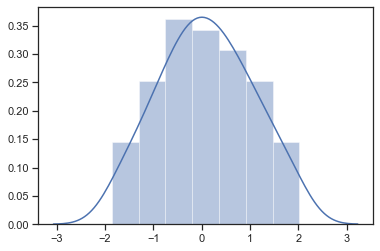

In [63]:
#Use distplot() by default will be histogram and fit a KDE
x = np.random.normal(size = 100)
sns.distplot(x);

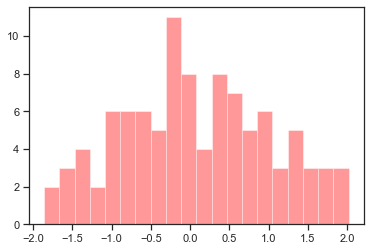

In [72]:
# Edit number of bins and remove KDE
sns.distplot(x, bins = 20, kde = False, color = 'red');

### Visualizing pairwise relationships in a dataset

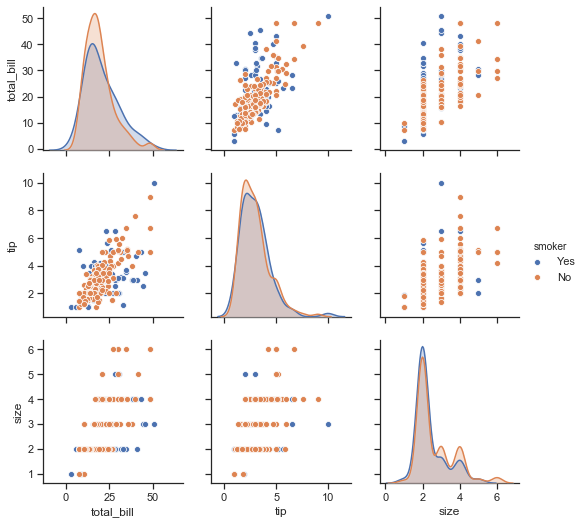

In [68]:
# use pairplot()
sns.pairplot(tips, hue = 'smoker')